<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/datamining/Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
x = data['Annual Income (k$)'].mean
x


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64>

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization


In [7]:

import matplotlib.pyplot as plt

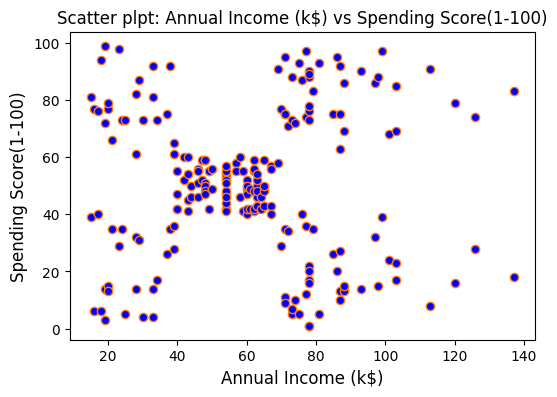

In [12]:
plt.subplots(figsize  =(6,4))
plt.scatter(data['Annual Income (k$)'], data ['Spending Score (1-100)'], color = 'C1', facecolor ='BLUE')
plt.xlabel('Annual Income (k$)', fontsize= 12)
plt.ylabel('Spending Score(1-100)', fontsize = 12)
plt.title('Scatter plpt: Annual Income (k$) vs Spending Score(1-100)')
plt.show()


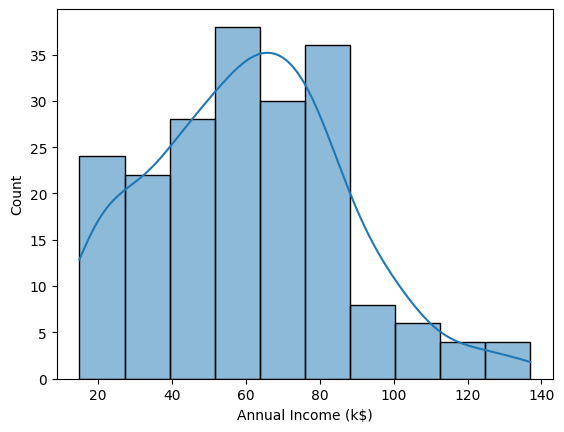

In [21]:
import seaborn as sns
sns.histplot(data = data, x = 'Annual Income (k$)', kde = True)
plt.show()

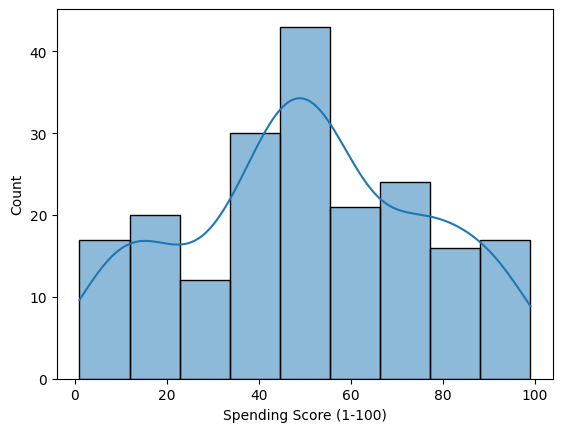

In [20]:
sns.histplot(data = data, x = 'Spending Score (1-100)', kde = True)
plt.show()

## Data PreProcessing

In [55]:
#Null Value
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
# Normalizing the Data
from sklearn.preprocessing import MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(data[['Spending Score (1-100)', 'Annual Income (k$)']]), columns=['Spending Score (1-100)', 'Annual Income (k$)'])
norm_df

,Spending Score (1-100),Annual Income (k$)
0,0.387755,0.000000
1,0.816327,0.000000
2,0.051020,0.008197
3,0.775510,0.008197
4,0.397959,0.016393
...,...,...
195,0.795918,0.860656
196,0.275510,0.909836
197,0.744898,0.909836
198,0.173469,1.000000


# K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

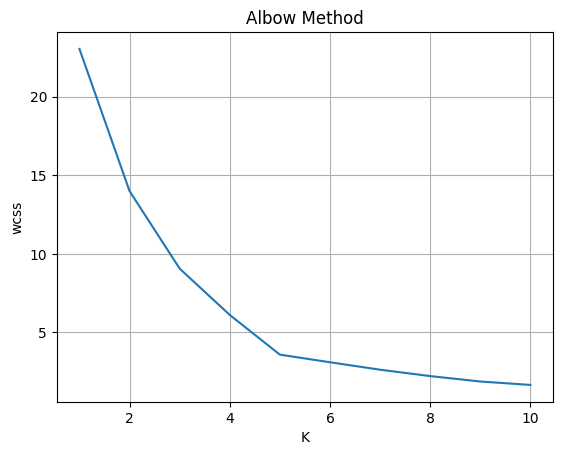

In [37]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
  kmeans.fit(norm_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Albow Method')
plt.xlabel('K')
plt.ylabel('wcss')
plt.grid('True')
plt.show()

In [42]:

kmeans= KMeans(n_clusters = 5, init ='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(norm_df)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


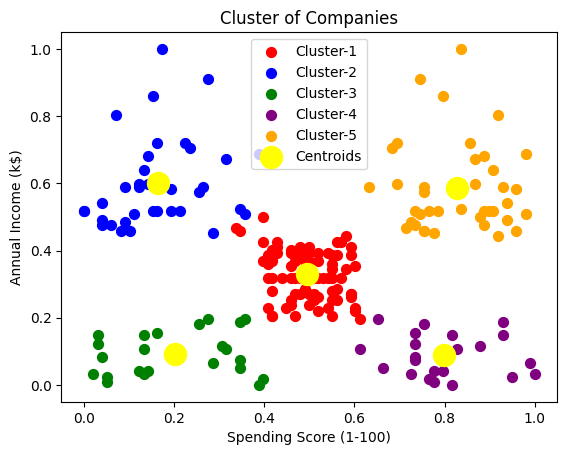

In [54]:
import matplotlib.pyplot as plt
X = norm_df
plt.scatter(X[y_kmeans == 0]['Spending Score (1-100)'],X[y_kmeans == 0]['Annual Income (k$)'],s=50, c='red', label='Cluster-1')
plt.scatter(X[y_kmeans == 1]['Spending Score (1-100)'],X[y_kmeans == 1]['Annual Income (k$)'],s=50, c='blue', label='Cluster-2')
plt.scatter(X[y_kmeans == 2]['Spending Score (1-100)'],X[y_kmeans == 2]['Annual Income (k$)'],s=50, c='green', label='Cluster-3')
plt.scatter(X[y_kmeans == 3]['Spending Score (1-100)'],X[y_kmeans == 3]['Annual Income (k$)'],s=50, c='purple', label='Cluster-4')
plt.scatter(X[y_kmeans == 4]['Spending Score (1-100)'],X[y_kmeans == 4]['Annual Income (k$)'],s=50, c='orange', label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 250, c = 'yellow', label= 'Centroids')

plt.legend()
plt.title('Cluster of Companies')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

#Cluster Analysis


### 1. Describe the characteristics of each cluster in terms of 'Annual Income' and 'Spending Score'.

##### Ans:- There are 5 types of people with income to spending ratio, Cluster-1 are those people who have medium income and medium expenses refering to middle class families, Cluster-3 and Cluster-4 are are low income families where Cluster-4 have higher spending and Cluster-3 have less spending.  Cluster-2 and Cluster-5 hace higher income where Cluster-2 have less spending than Cluster-5. This shows the economoic level of families in the society

### 2. Which cluster(s) might be of particular interest to the mall's marketing team for promotional campaigns? Justify your answer.

##### Ans:- Cluster-2 should be trageted by marketing teams because they spend higher than other Clusters. Cluster-1 should be Second on the list

### 3. How do the clusters compare to your initial visual estimation from the scatter plot?

##### Ans- Looks almost same just inverted